Path: A -> B -> F -> J -> N -> O, Cost: 15


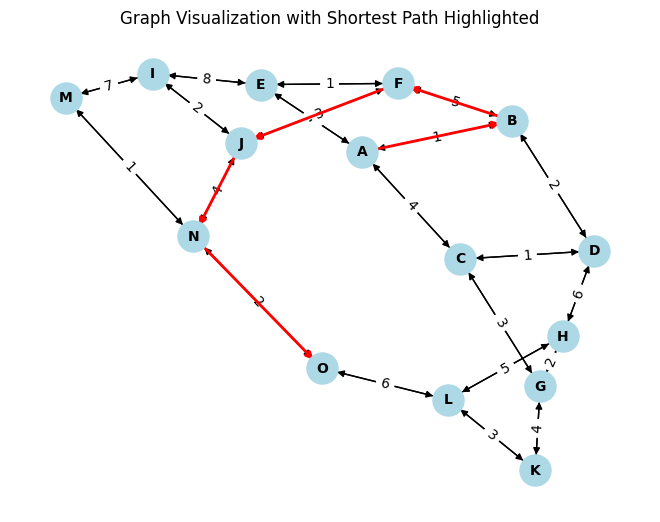

In [1]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

def uniform_cost_search(graph, start, goal):
    """
    Perform Uniform Cost Search (UCS) on a graph.

    Args:
        graph (dict): The graph represented as an adjacency list where each node points to a list
                      of tuples (neighbor, cost).
        start (str): The starting node.
        goal (str): The goal node.

    Returns:
        path (list): The least-cost path from start to goal.
        total_cost (float): The total cost of the path.
    """
    # Priority queue to store (cost, node, path)
    priority_queue = [(0, start, [])]
    visited = set()

    while priority_queue:
        # Pop the node with the smallest cost
        current_cost, current_node, path = heapq.heappop(priority_queue)

        # If the node has already been visited, skip it
        if current_node in visited:
            continue

        # Update path and mark node as visited
        path = path + [current_node]
        visited.add(current_node)

        # If the goal is reached, return the path and cost
        if current_node == goal:
            return path, current_cost

        # Add neighbors to the priority queue
        for neighbor, cost in graph.get(current_node, []):
            if neighbor not in visited:
                heapq.heappush(priority_queue, (current_cost + cost, neighbor, path))

    # If the goal is not reachable, return failure
    return None, float('inf')


def visualize_graph(graph, path=None):
    """
    Visualize the graph using matplotlib and networkx.

    Args:
        graph (dict): The graph represented as an adjacency list where each node points to a list
                      of tuples (neighbor, cost).
        path (list): The shortest path to highlight, if any.
    """
    G = nx.DiGraph()

    # Add edges to the graph
    for node, neighbors in graph.items():
        for neighbor, cost in neighbors:
            G.add_edge(node, neighbor, weight=cost)

    pos = nx.spring_layout(G, seed=42)  # Positioning for nodes (consistent with seed)
    edge_labels = nx.get_edge_attributes(G, 'weight')

    # Draw nodes and edges
    nx.draw(G, pos, with_labels=True, node_size=500, node_color="lightblue", font_weight="bold", font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Highlight the path if provided
    if path:
        edges_in_path = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=edges_in_path, edge_color="red", width=2)

    plt.title("Graph Visualization with Shortest Path Highlighted")
    plt.show()


# Example usage
if __name__ == "__main__":
    # A more complex graph with additional nodes and edges
    graph = {
        'A': [('B', 1), ('C', 4), ('E', 7)],
        'B': [('A', 1), ('D', 2), ('F', 5)],
        'C': [('A', 4), ('D', 1), ('G', 3)],
        'D': [('B', 2), ('C', 1), ('H', 6)],
        'E': [('A', 7), ('F', 1), ('I', 8)],
        'F': [('B', 5), ('E', 1), ('J', 3)],
        'G': [('C', 3), ('H', 2), ('K', 4)],
        'H': [('D', 6), ('G', 2), ('L', 5)],
        'I': [('E', 8), ('J', 2), ('M', 7)],
        'J': [('F', 3), ('I', 2), ('N', 4)],
        'K': [('G', 4), ('L', 3)],
        'L': [('H', 5), ('K', 3), ('O', 6)],
        'M': [('I', 7), ('N', 1)],
        'N': [('J', 4), ('M', 1), ('O', 2)],
        'O': [('L', 6), ('N', 2)]
    }

    start_node = 'A'
    goal_node = 'O'

    # Run UCS and get the path and cost
    path, cost = uniform_cost_search(graph, start_node, goal_node)

    if path:
        print(f"Path: {' -> '.join(path)}, Cost: {cost}")
    else:
        print("No path found.")

    # Visualize the graph and highlight the path
    visualize_graph(graph, path)



# import heapq
# import matplotlib.pyplot as plt
# import networkx as nx

# def uniform_cost_search(graph, start, goal):
#     """
#     Perform Uniform Cost Search (UCS) on a graph.

#     Args:
#         graph (dict): The graph represented as an adjacency list where each node points to a list
#                       of tuples (neighbor, cost).
#         start (str): The starting node.
#         goal (str): The goal node.

#     Returns:
#         path (list): The least-cost path from start to goal.
#         total_cost (float): The total cost of the path.
#     """
#     # Priority queue to store (cost, node, path)
#     priority_queue = [(0, start, [])]
#     visited = set()

#     while priority_queue:
#         # Pop the node with the smallest cost
#         current_cost, current_node, path = heapq.heappop(priority_queue)

#         # If the node has already been visited, skip it
#         if current_node in visited:
#             continue

#         # Update path and mark node as visited
#         path = path + [current_node]
#         visited.add(current_node)

#         # If the goal is reached, return the path and cost
#         if current_node == goal:
#             return path, current_cost

#         # Add neighbors to the priority queue
#         for neighbor, cost in graph.get(current_node, []):
#             if neighbor not in visited:
#                 heapq.heappush(priority_queue, (current_cost + cost, neighbor, path))

#     # If the goal is not reachable, return failure
#     return None, float('inf')


# def visualize_graph(graph, path=None):
#     """
#     Visualize the graph using matplotlib and networkx.

#     Args:
#         graph (dict): The graph represented as an adjacency list where each node points to a list
#                       of tuples (neighbor, cost).
#         path (list): The shortest path to highlight, if any.
#     """
#     G = nx.DiGraph()

#     # Add edges to the graph
#     for node, neighbors in graph.items():
#         for neighbor, cost in neighbors:
#             G.add_edge(node, neighbor, weight=cost)

#     pos = nx.spring_layout(G)  # Positioning for nodes
#     edge_labels = nx.get_edge_attributes(G, 'weight')

#     # Draw nodes and edges
#     nx.draw(G, pos, with_labels=True, node_size=500, node_color="lightblue", font_weight="bold", font_size=10)
#     nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

#     # Highlight the path if provided
#     if path:
#         edges_in_path = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
#         nx.draw_networkx_edges(G, pos, edgelist=edges_in_path, edge_color="red", width=2)

#     plt.title("Graph Visualization with Shortest Path Highlighted")
#     plt.show()


# # Example usage
# if __name__ == "__main__":
#     graph = {
#         'A': [('B', 1), ('C', 4)],
#         'B': [('A', 1), ('C', 2), ('D', 5)],
#         'C': [('A', 4), ('B', 2), ('D', 1)],
#         'D': [('B', 5), ('C', 1)]
#     }

#     start_node = 'A'
#     goal_node = 'D'

#     # Run UCS and get the path and cost
#     path, cost = uniform_cost_search(graph, start_node, goal_node)

#     if path:
#         print(f"Path: {' -> '.join(path)}, Cost: {cost}")
#     else:
#         print("No path found.")

#     # Visualize the graph and highlight the path
#     visualize_graph(graph, path)
